# Ford GoBike System Data

# 1- Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

%matplotlib inline

In [2]:
# Read the dataset abd printout head
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [3]:
print ('There are {0} features, and {1} Observations in the dataset'.format(df.shape[1], df.shape[0]))

There are 16 features, and 183412 Observations in the dataset


## 1.1 Check for Null Values

In [4]:
df.info(null_counts = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

In [6]:
df_nulls = df[df.isnull().any(axis=1)]
df_nulls.shape

(8460, 16)

In [7]:
# Drop null values and create new dataset
df2 = df.dropna()

In [8]:
df2.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

Lets Fix the data types of some columns

In [9]:
df2.start_station_id = df2.start_station_id.astype(int)
df2.end_station_id = df2.end_station_id.astype(int)
df2.user_type  = df2.user_type.astype('category')
df2.member_gender  = df2.member_gender.astype('category')
df2.start_time = pd.to_datetime(df2.start_time)
df2.end_time = pd.to_datetime(df2.end_time)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

/home/hhalim/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


8460 Rows have missing values in columns member_birth_year, and member_gender

## 1.2 Check for Duplicated values

In [10]:
df2.duplicated().any()
#no duplicated values which is good

False

## 1.3 Know more about the dataset

In [11]:
# Frequency tables for each categorical feature
for column in df2.select_dtypes(include=['object', 'category']).columns:
    display(pd.crosstab(index=df2[column], columns='% observations', normalize='columns')*100)

col_0,% observations
start_station_name,
10th Ave at E 15th St,0.031437
10th St at Fallon St,0.197197
10th St at University Ave,0.106886
11th St at Bryant St,0.452696
11th St at Natoma St,0.459555
...,...
Williams Ave at 3rd St,0.027436
Williams Ave at Apollo St,0.014290
Willow St at Vine St,0.005144


col_0,% observations
end_station_name,
10th Ave at E 15th St,0.020005
10th St at Fallon St,0.205199
10th St at University Ave,0.156043
11th St at Bryant St,0.540720
11th St at Natoma St,0.479560
...,...
Williams Ave at 3rd St,0.028579
Williams Ave at Apollo St,0.011432
Willow St at Vine St,0.002858


col_0,% observations
user_type,
Customer,9.468883
Subscriber,90.531117


col_0,% observations
member_gender,
Female,23.323540
Male,74.591888
Other,2.084572


col_0,% observations
bike_share_for_all_trip,
No,90.085281
Yes,9.914719


In [12]:
# Start Stations and End stations 
display(df2.describe(include=np.object))

,start_station_name,end_station_name,bike_share_for_all_trip
count,174952,174952,174952
unique,329,329,2
top,Market St at 10th St,San Francisco Caltrain Station 2 (Townsend St...,No
freq,3649,4624,157606


In [13]:
#a sample dataset where start_station repeated more than 1000 times
df_sample = df2.groupby("start_station_name").filter(lambda x: len(x) > 1000)
df_sample.shape
df_sample

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993.0,Male,No
14,395,2019-02-28 23:56:26.848,2019-03-01 00:03:01.947,243,Bancroft Way at College Ave,37.869360,-122.254337,252,Channing Way at Shattuck Ave,37.865847,-122.267443,4786,Subscriber,1988.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183403,249,2019-02-01 00:15:12.067,2019-02-01 00:19:21.699,256,Hearst Ave at Euclid Ave,37.875112,-122.260553,247,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183405,111,2019-02-01 00:14:49.874,2019-02-01 00:16:41.301,324,Union Square (Powell St at Post St),37.788300,-122.408531,19,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No


In [14]:
print("We have {0} Start Stations, and {1} End Stations"
      .format(len(df2.start_station_id.unique()), len(df2.end_station_id.unique())))
print("Number of unique bikes: {0}".format(len(df2.bike_id.unique())))


We have 329 Start Stations, and 329 End Stations
Number of unique bikes: 4607


# 2. Data Analysis

## 2.1 Univariate Analysis

### Duration in Seconds & Minutes

In [15]:
df2.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [16]:
df2['duration_min'] = df2.duration_sec / 60

<ipython-input-16-365930379025>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['duration_min'] = df2.duration_sec / 60


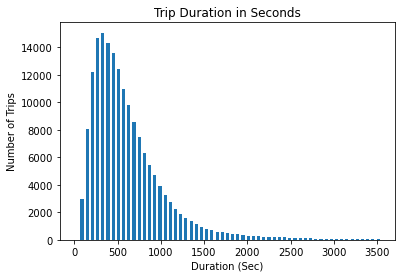

In [17]:
# Duration of the bike rides
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df2, x = 'duration_sec', bins = bin_edges, rwidth = 0.6);

plt.title("Trip Duration in Seconds")
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Trips');

We could also show the distribution of the duration in minutes 

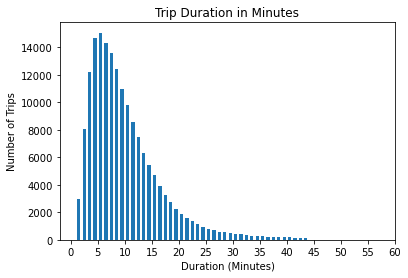

In [18]:

bin_edges = bin_edges = np.arange(0, 45, 1)
plt.hist(data = df2, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45, 50, 55, 60]
plt.xticks(ticks)
plt.title("Trip Duration in Minutes")
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Trips');

In [19]:
df2.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [20]:
df2.duration_min.quantile([.1, .25, .5, .75, .95, .99])

0.10     3.550000
0.25     5.383333
0.50     8.500000
0.75    13.150000
0.95    25.516667
0.99    52.933333
Name: duration_min, dtype: float64

<font color='red' bold>__INSIGHT:__ </font> As shown above, 95% of the data have average tripe time less than 26 minutes, 99% with average trip time less than 53 minutes. While in general the average trip time is about 12 minutes. We still have some extreme values in column (duration_min) but moving forward we focus only with rows that have average trip time less than 60m.

### User Types

Text(0.5, 0, '86.36% of data are for Subscribers, 9.03% is the proportion of Customers')

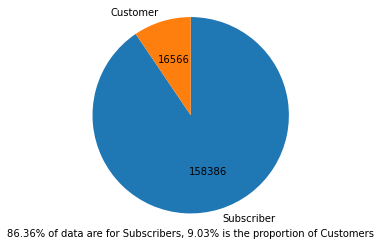

In [21]:
# user type
df2.user_type.unique()
useTypeCounts = df2.user_type.value_counts()
p, tx, autotexts = plt.pie(useTypeCounts, labels=useTypeCounts.index,startangle = 90, counterclock=False, autopct='')

for i, a in enumerate(autotexts):
    a.set_text("{}".format(useTypeCounts[i]))
plt.axis('square')
plt.xlabel('{0:.2f}% of data are for Subscribers, {1:.2f}% is the proportion of Customers'.
           format(
               (useTypeCounts[0] / df.shape[0] * 100),
               (useTypeCounts[1] / df.shape[0] * 100)))

<font color='red' bold>__INSIGHT:__ </font> Most of our users are subscribers 86.36%, Customers shares is 9.03%.

### User Gender

Text(0.5, 0, '71.15% of our Travellers are males, 22.25% is the proportion of Female riders')

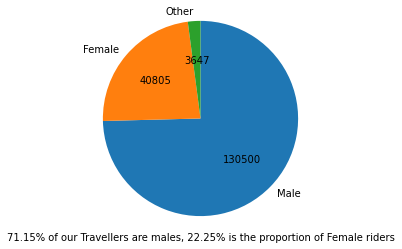

In [22]:
# user type
df2.member_gender.unique()
genderCounts = df2.member_gender.value_counts()
p, tx, autotexts = plt.pie(genderCounts, labels=genderCounts.index,startangle = 90, counterclock=False, autopct='')

for i, a in enumerate(autotexts):
    a.set_text("{}".format(genderCounts[i]))
plt.axis('square')
plt.xlabel('{0:.2f}% of our Travellers are males, {1:.2f}% is the proportion of Female riders'.
           format(
               (genderCounts[0] / df.shape[0] * 100),
               (genderCounts[1] / df.shape[0] * 100)))

<font color='red' bold>__INSIGHT:__ </font> Most of our users are Males 71.15%, Female riders represents 22.25% of the dataset.

### When are most trips taken in terms of time of day, day of the week, or month of the year

#### Month of The Year

As it shown in the below, all the records are in February, no distrubtion by month of the year is relevant here

In [23]:

df2.groupby(df2['start_time'].dt.month.astype(int)).count()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
start_time,,,,,,,,,,,,,,,,,
2,174952,174952,174952,174952,174952,174952,174952,174952,174952,174952,174952,174952,174952,174952,174952,174952,174952


#### Day of a Month

Text(0.5, 0, 'Distribution of shares per days of month')

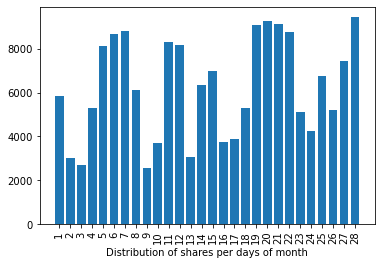

In [24]:
start_times = df2.groupby(df2['start_time'].dt.day).count().start_time
plt.bar(start_times.index, start_times)
plt.xticks(start_times.index, rotation=90)
plt.xlabel('Distribution of shares per days of month')

#### Weekday

Text(0.5, 0, 'Distribution of shares per days of month')

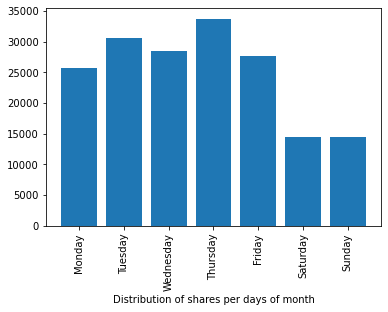

In [25]:
start_times = df2.groupby(df2['start_time'].dt.weekday).count().start_time
days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(days_of_the_week, start_times)
plt.xticks(days_of_the_week, rotation=90)
plt.xlabel('Distribution of shares per days of month')

<font color='red' bold>__INSIGHT:__ </font> As hown above, weekends are have the lowest shares every week

#### Day Hours

Text(0.5, 0, 'Distribution of shares over hours of the day')

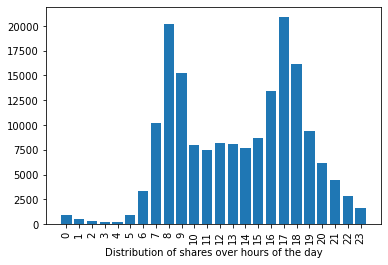

In [26]:
start_times = df2.groupby(df2['start_time'].dt.hour).count().start_time

plt.bar(start_times.index, start_times)
plt.xticks(start_times.index, rotation=90)
plt.xlabel('Distribution of shares over hours of the day')

<font color='red' bold>__INSIGHT:__ </font> Morning (7-9 AM) and evening (3-7 PM) rush hours have more data than other hours of the day 

## User Age

<ipython-input-27-73e0f7d08976>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age_years'] = 2019 - df2.member_birth_year


Text(0, 0.5, 'Number of Users')

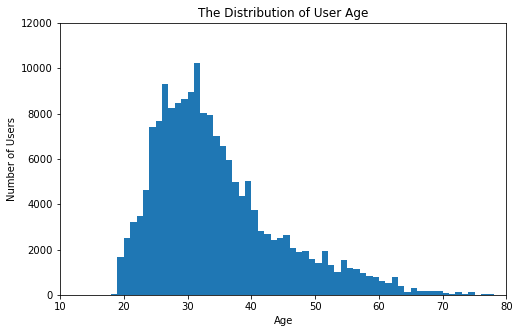

In [27]:
# Use member_birth_year to draw the user's age distribution.
#add column for user age to be used in bivariate analysis
df2['age_years'] = 2019 - df2.member_birth_year

binsize = 1
bins = np.arange(0, df2['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x = 'age_years', bins = bins)
plt.axis([10, 80, 0, 12000])
plt.title('The Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')

In [28]:
df2.age_years.quantile([.10, .2, .5,.75, .9, .95, .99])

0.10    24.0
0.20    26.0
0.50    32.0
0.75    39.0
0.90    49.0
0.95    55.0
0.99    64.0
Name: age_years, dtype: float64

<font color='red' bold>__INSIGHT:__ </font> Most of our users are under Age 60 (95%) and 99% of users are under ager 65.

## 2.1 Bivariate Analysis

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,age_years
duration_sec,1.000000,-0.006876,0.012237,-0.040946,0.002552,0.012854,-0.041438,0.011037,-0.006041,1.000000,0.006041
start_station_id,-0.006876,1.000000,-0.195403,0.465130,0.339914,-0.184317,0.472373,-0.068114,0.115115,-0.006876,-0.115115
start_station_latitude,0.012237,-0.195403,1.000000,-0.678105,-0.184497,0.990130,-0.683552,0.051140,-0.075238,0.012237,0.075238
start_station_longitude,-0.040946,0.465130,-0.678105,1.000000,0.485894,-0.682598,0.992507,-0.144058,0.125346,-0.040946,-0.125346
end_station_id,0.002552,0.339914,-0.184497,0.485894,1.000000,-0.202501,0.475503,-0.056796,0.112709,0.002552,-0.112709
end_station_latitude,0.012854,-0.184317,0.990130,-0.682598,-0.202501,1.000000,-0.685085,0.050507,-0.075339,0.012854,0.075339
end_station_longitude,-0.041438,0.472373,-0.683552,0.992507,0.475503,-0.685085,1.000000,-0.145895,0.126191,-0.041438,-0.126191
bike_id,0.011037,-0.068114,0.051140,-0.144058,-0.056796,0.050507,-0.145895,1.000000,0.036226,0.011037,-0.036226
member_birth_year,-0.006041,0.115115,-0.075238,0.125346,0.112709,-0.075339,0.126191,0.036226,1.000000,-0.006041,-1.000000
duration_min,1.000000,-0.006876,0.012237,-0.040946,0.002552,0.012854,-0.041438,0.011037,-0.006041,1.000000,0.006041


array([[<AxesSubplot:xlabel='duration_sec', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='start_station_id', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='start_station_latitude', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='start_station_longitude', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='end_station_id', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='end_station_latitude', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='end_station_longitude', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='bike_id', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='member_birth_year', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='duration_min', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='age_years', ylabel='duration_sec'>],
       [<AxesSubplot:xlabel='duration_sec', ylabel='start_station_id'>,
        <AxesSubplot:xlabel='start_station_id', ylabel='start_station_id'>,
        <AxesSubplot:xlabel='start_station_latitude', ylabel='

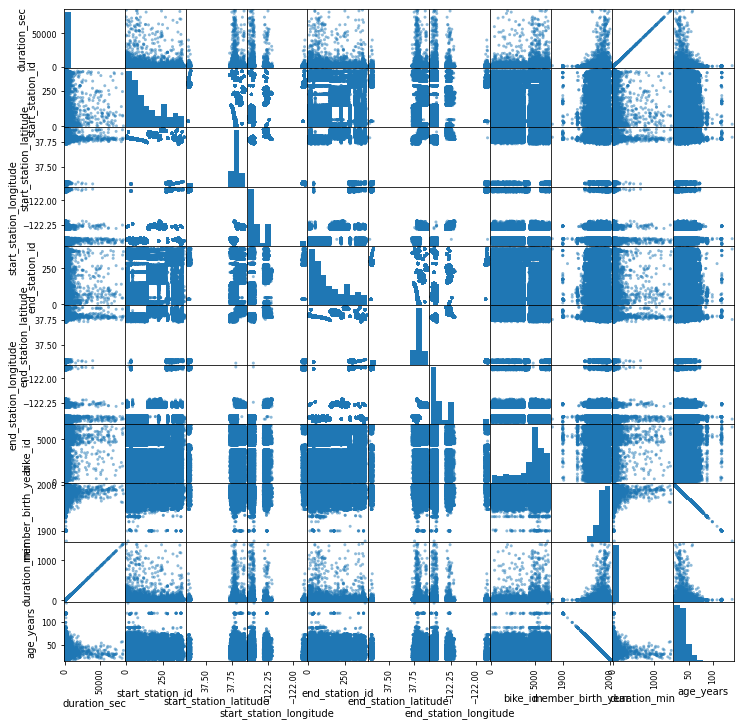

In [29]:
display(df2.corr())
pd.plotting.scatter_matrix(df2, figsize=(12, 12))

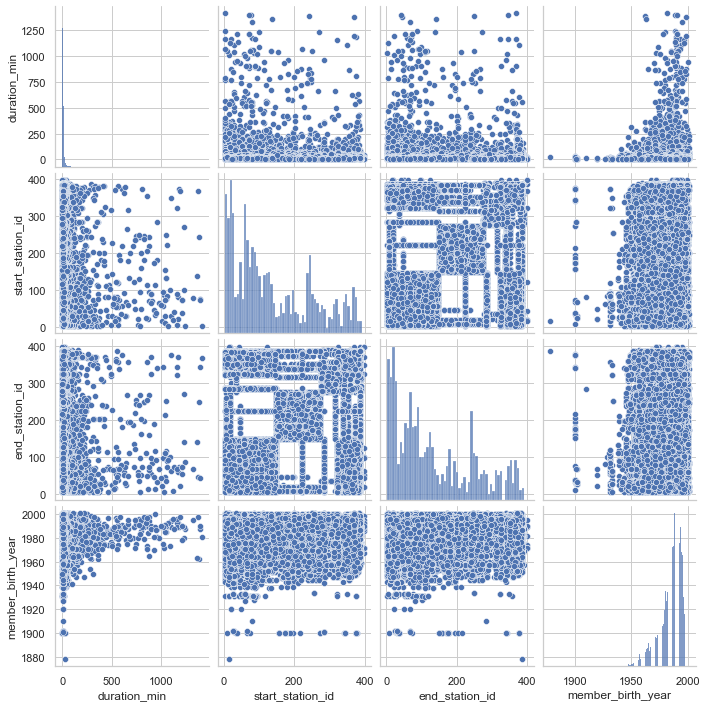

In [30]:
sb.set(style="whitegrid", context="notebook")
sb.pairplot(df2[["duration_min", "start_station_id",
                        "end_station_id","member_birth_year"]])

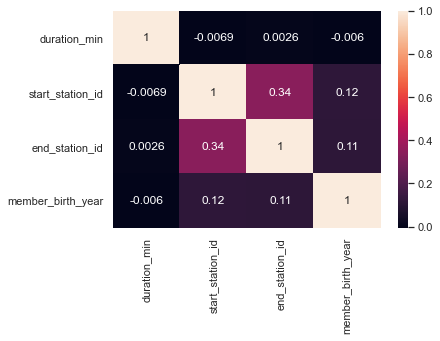

In [31]:
corr = df2[["duration_min", "start_station_id",
                        "end_station_id","member_birth_year"]].corr()
corr
ax = sb.heatmap(corr, annot=True,)

### Check if duration in minutes is related to the user Age

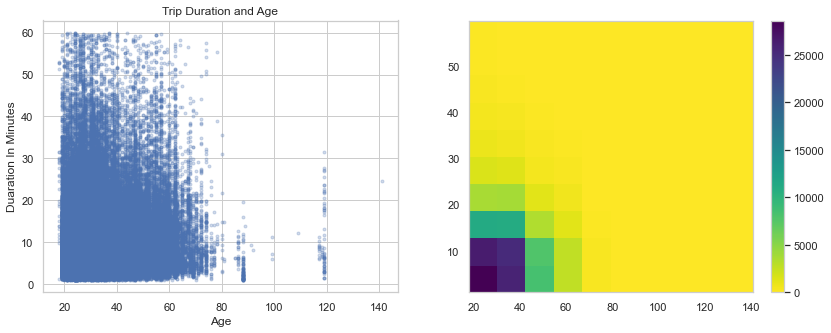

In [32]:
# as mentioned earlier we focus only on trips with duration in minutes less than 60m (avoid extreme values)
df3 = df2[df2.duration_min < 60] 
plt.figure(figsize=[14,5])
plt.subplot(1, 2, 1)
plt.scatter(df3.age_years, df3.duration_min, alpha = 0.25, marker = '.' )
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duaration In Minutes')

plt.subplot(1, 2, 2)
bins_y  = np.arange(200, 1250+50, 50)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(df3.age_years, df3.duration_min, cmap='viridis_r')
plt.colorbar();
#250-1250

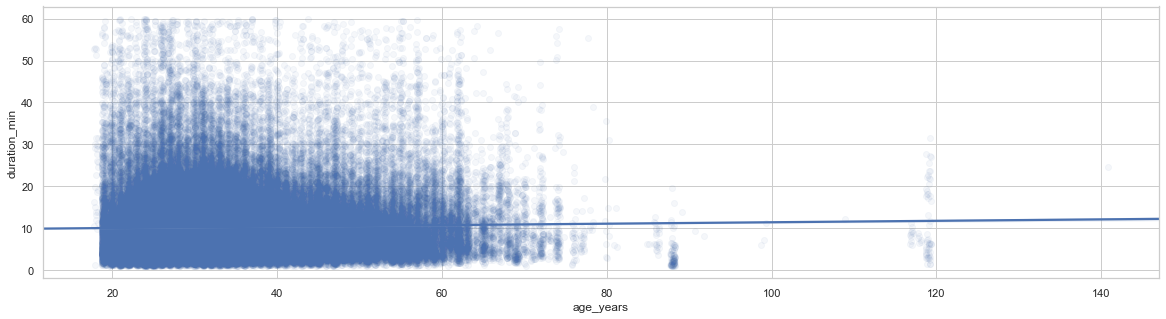

In [33]:
plt.figure(figsize = [20, 5])

sb.regplot(data = df3, x = 'age_years', y = 'duration_min', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

<font color='red' bold>__INSIGHT:__ </font> The trip duration in minutes is higher in age range (20-60). 

### Relation between trip duration and member gender


Text(0, 0.5, 'Duration In Minutes')

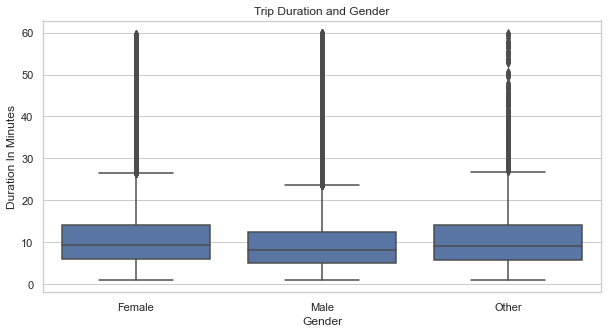

In [34]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df3, x = 'member_gender', y = 'duration_min', color = base_color)
#plt.ylim([-10, 2000])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration In Minutes')

<font color='red' bold>__INSIGHT:__ </font> The trip duration in minutes for femal and other is higher than male users.

## 2.3 Multivariate Exploration

Text(0, 0.5, 'Duration in Minutes')

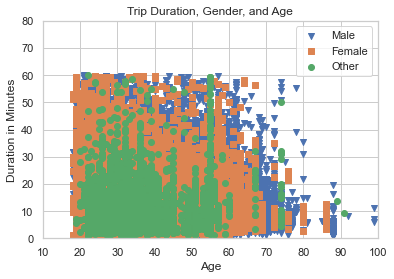

In [35]:

markers = [['Male', 'v'],['Female', 's'],['Other', 'o']]

for gender, marker in markers:
    df_gender = df3[df3.member_gender == gender]
    plt.scatter(df_gender.age_years, df_gender.duration_min, marker = marker, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.axis([10, 100, 0, 80 ])
plt.title('Trip Duration, Gender, and Age')
plt.xlabel('Age')
plt.ylabel('Duration in Minutes')

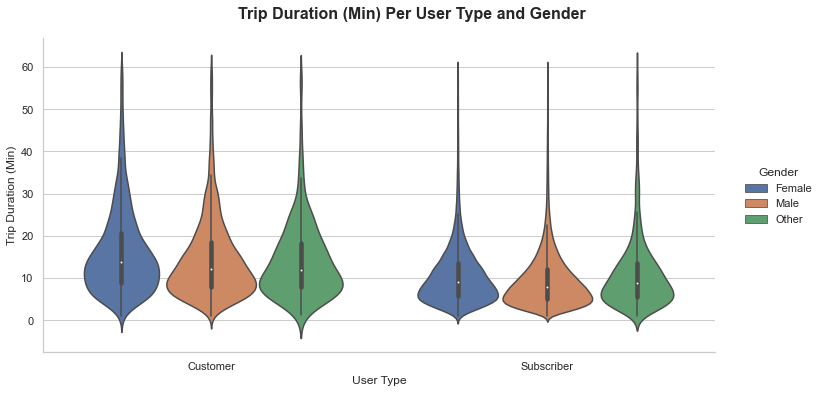

In [36]:

# Duration (min) per user type and gender

graph = sb.catplot(data=df3, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

<font color='red' bold>__INSIGHT:__ </font> For Vustomer, and Subscribers, female users tend to have higher average trip time